In [1]:
import Magnetar
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#mysurfmodel=Magnetar.dipole_model(Magnetar.condensed_surface,1,1e13,70565.,fixed_ions=False)
mysurfmodel=Magnetar.dipole_model(Magnetar.modified_bb_atmo,0.6,1.25e14,freq_power=2,sigma_power=4/13,kb_suppress=True,limb_darkening=True)
cap1=Magnetar.modified_bb_atmo(1.9,1.25e14,0.0,freq_power=2,sigma_power=4/13,kb_suppress=True,limb_darkening=True)
cap2=Magnetar.modified_bb_atmo(1.9,1.25e14,1,freq_power=2,sigma_power=4/13,kb_suppress=True,limb_darkening=True)
cap3=Magnetar.modified_bb_atmo(0.6,1.25e14,1.1,freq_power=2,sigma_power=4/13,kb_suppress=True,limb_darkening=True)
mysurfmodel.add_patch(cap1,0)
mysurfmodel.add_patch(cap2,2)
mysurfmodel.add_patch(cap3,2.2)
mysurfmodel.sort_patches()
aa=mysurfmodel.mcolat
# copy the front surface to the back of the star
# add the angles
mysurfmodel.mcolat=aa+[180-i for i in aa[::-1]]
# add the patches
mysurfmodel.patches=mysurfmodel.patches+mysurfmodel.patches[::-1]

/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/QEDSurface/magnetar.py/Magnetar/simple_atmospheres.py:5: RuntimeWarning: overflow encountered in expm1
  return 208452.792 * ee**3 / np.expm1(ee / tt) / 2


In [3]:
pfield_test=Magnetar.pfield().loaddata('Sample_Pfields/pfield_models_QED/pfield_5keV_30deg')

In [4]:
pfield_test.recalculate(1.65426,mysurfmodel,gtt=(1-2*2.0/10.0)**0.5)

(14523.639474500727, -14486.308086686999)

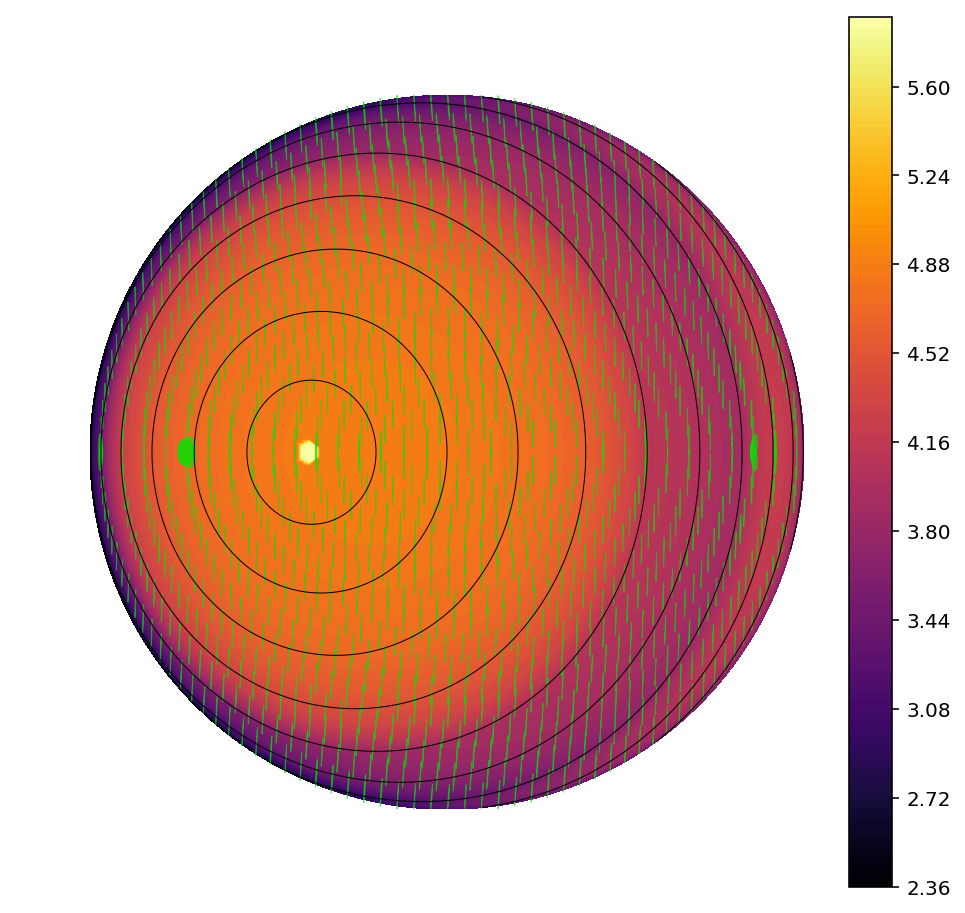

In [5]:
pfield_test

In [6]:
# calculate the mean intensity over the surface for a range of photon energies
pfield_test.calcvalues(mysurfmodel,gtt=(1-2*2.0/10.0)**0.5)


In [7]:
# load a datafile
datae,dataf=np.loadtxt('4U_0142+614.dat',unpack=True,usecols=(0,1))

In [8]:
# get the mean intensities and energy bins for the orientation
ee=pfield_test.ebins
ivec=pfield_test.iint
qvec=pfield_test.qint
# load a file with the interstellar absorption model
eabs,sabs=np.loadtxt('tbabs.dat',unpack=True)
sabs=sabs
ii=np.argsort(eabs)
eabs=eabs[ii]
sabs=sabs[ii]
# absorption cross-section per hydrogen atom in units of 1e-24 cm^2 for our energy bins
ssabs=np.interp(ee,eabs,sabs)/(ee)**3*1e-24
# the best-fit hydrogen column is 0.52e22 /cm2
totabs=np.exp(-0.6e22*ssabs)

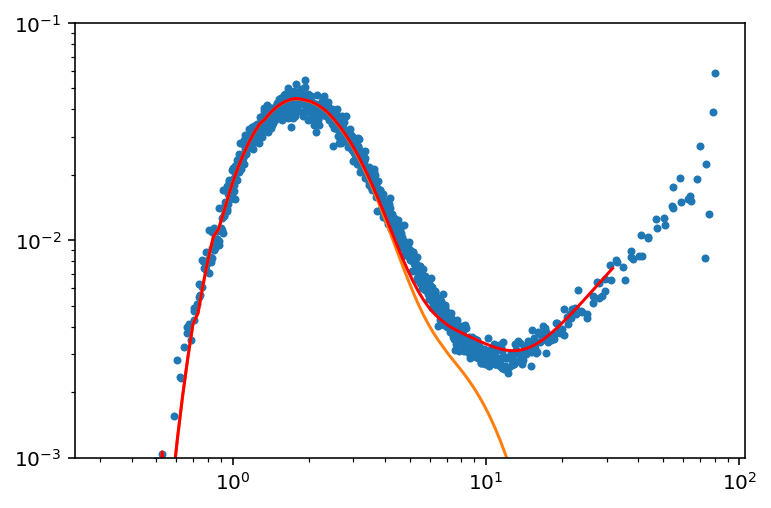

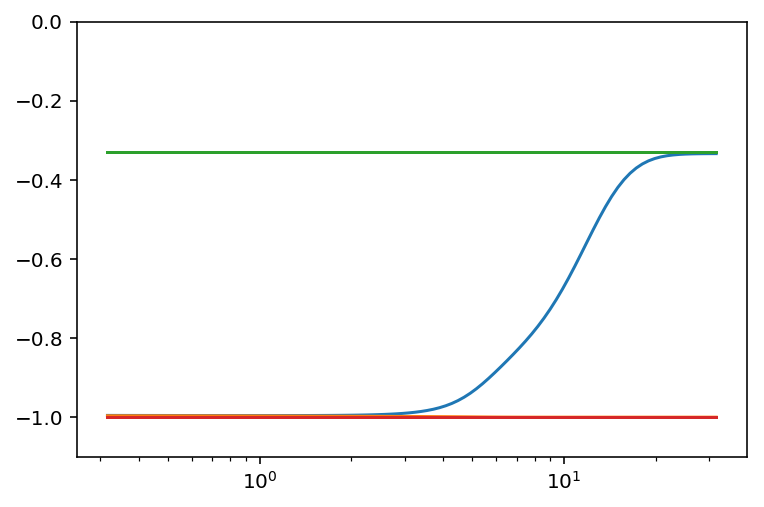

In [9]:
# plot the model against the data
norm=2.5e5
plt.loglog(datae,dataf,'.')
plt.loglog(ee,totabs*ivec/norm)
plt.loglog(ee,totabs*(ivec/norm+ee**1.3/1.2e4),'r')
plt.ylim(1e-3,1e-1)
plt.show()
plt.plot(ee,(-ee**1.3/1.2e4/3+qvec/norm)/(ivec/norm+ee**1.3/1.2e4))
plt.plot(ee,qvec/ivec)
plt.plot([ee[0],ee[-1]],[-0.33,-0.33])
plt.plot([ee[0],ee[-1]],[-1.0,-1.0])
plt.xscale("log")
plt.ylim(-1.1,0)
plt.show()